# Réalisation d'une analyse statistique avec le langage R
Dans un premier temps, nous allons récupérer les données dans le CSV

In [217]:
# Charger les données
source("charger.R")
mondata <- charger(2105482)
Y <- mondata$Sales
X1 <- mondata$Price
X2 <- mondata$Advertising
X3 <- mondata$Region

# Phase 1 : Analyse statistique descriptive et inférence.
## Partie A

### Histogramme des ventes

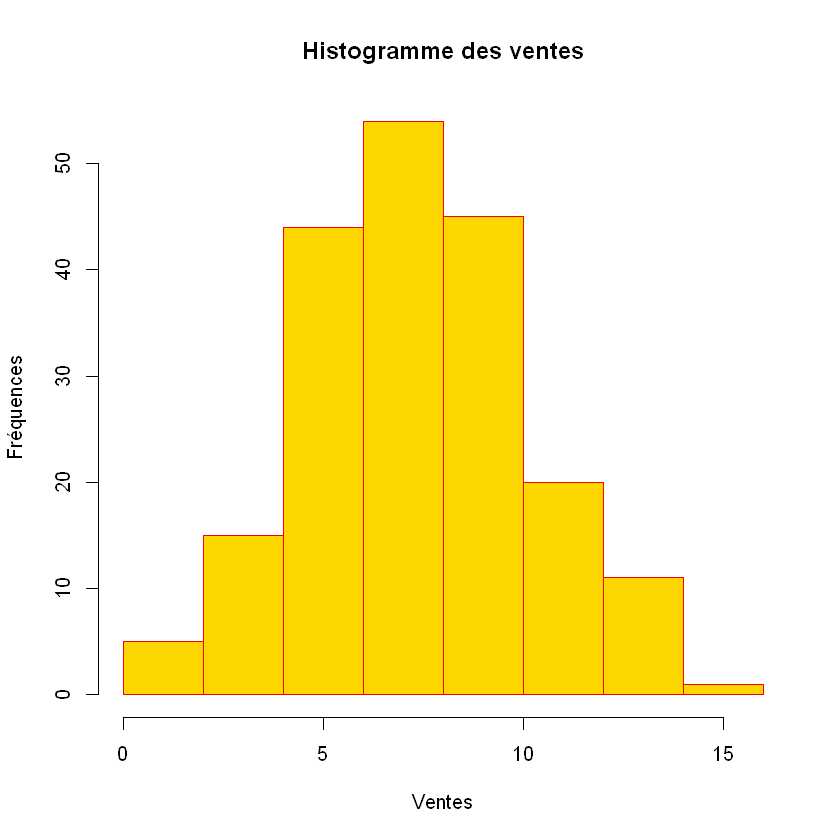

In [218]:
hist(Y, col="gold",border="red", main=paste("Histogramme des ventes"),
     xlab="Ventes",ylab="Fréquences")

### Diagramme de Tukey pour les ventes

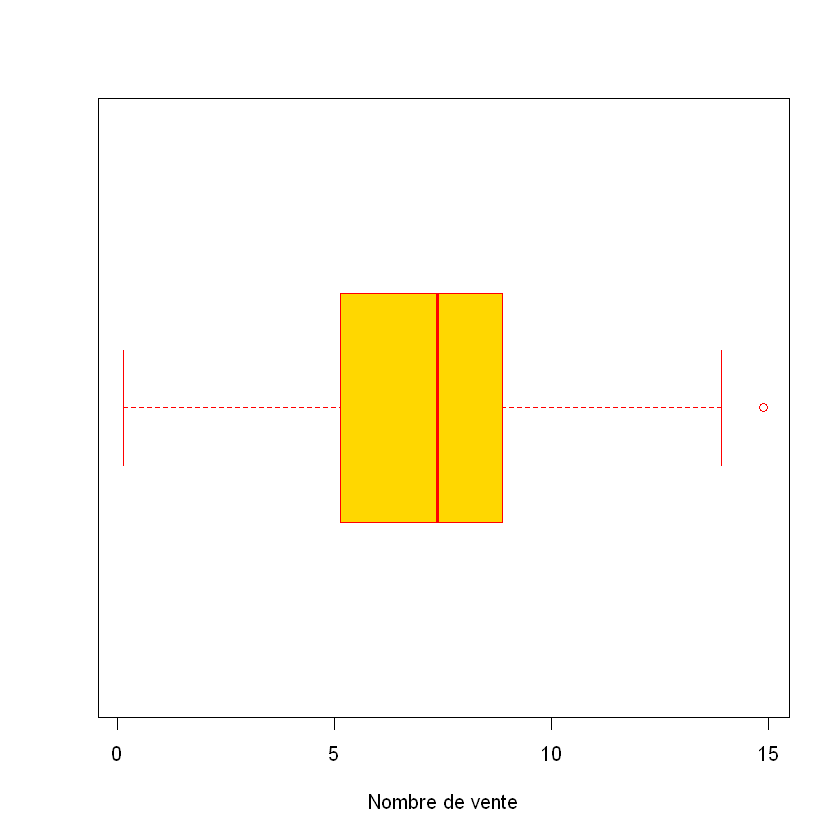

In [219]:
boxplot(Y,
horizontal=TRUE,
col="gold",border="red",
xlab="Nombre de vente")

### Droite de Henry

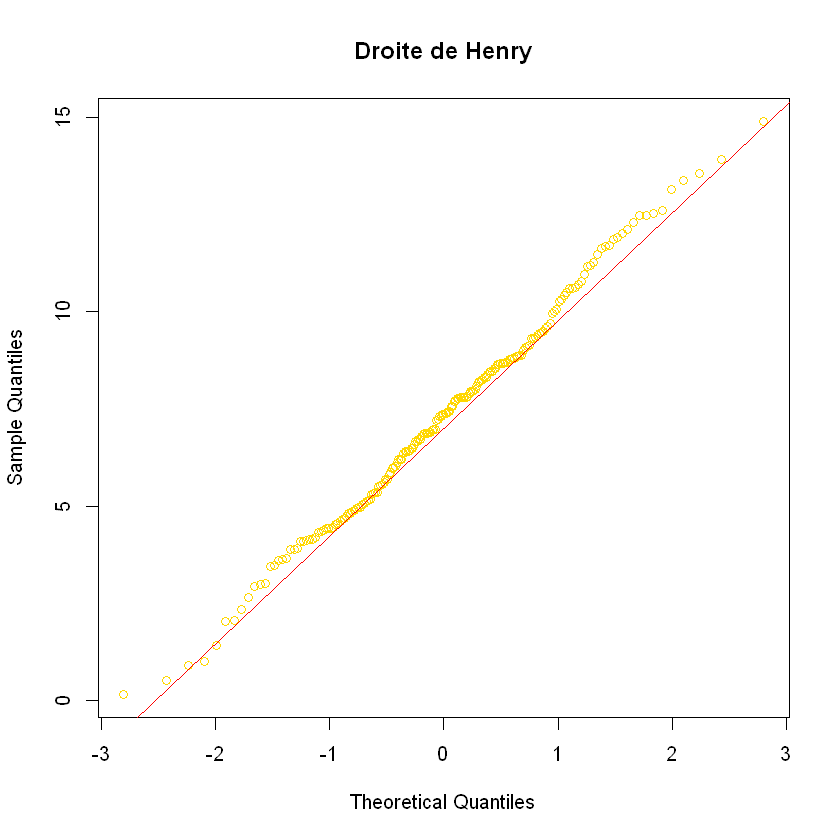

In [220]:
qqnorm(Y, col ="gold", main=paste("Droite de Henry"))
qqline(Y, col ="red")


### Test de normalité (Shapiro-Wilk)

In [221]:
shapiro.test(Y)


	Shapiro-Wilk normality test

data:  Y
W = 0.99, p-value = 0.7


### Interprétation du test de normalité droite de Henry et test de Shapiro-Wilk
D'après la droite de Henry et le test de normalité (Shapiro-Wilk), on déduit que la variable Y suit une loi normale.

Premièrement, on remarque que plus on se rapproche du milieu, plus les points ont tendance à être alignés et donc, construire une droite et vers les bornes, on remarque une symétrie dans le dispersement des valeurs.

Deuxièmement, on a la valeur observée de W est grande (W = 0.99463) et p-value = 0.7128 grande (supérieure a 0.05), alors on accepte H0 qui est l'hypothèse que Y suit une loi normale

### Tableau de statistique descriptive

In [222]:
mesureStatistique = data.frame(mondata=c("Sales"), 
                     moyenne=NA, écartType=NA, q1=NA, mediane=NA,
                     q3=NA, IntervalConfiance=NA)
# moyenne,
mesureStatistique$moyenne = sapply(2, function(i) mean(Y)) 
# quartiles q1, q2 = mediane, q3 
mesureStatistique[1, c("q1", "mediane", "q3")] = quantile(Y, probs = c(0.25,0.5,0.75))
# écart type,
mesureStatistique$écartType = sapply(2, function(i) sd(Y)) 
# intervalle de confiance pour la moyenne
ci <- t.test(Y, conf.level = 0.95)$conf.int
# cat("95% Confidence Interval: [", ci[1], ", ", ci[2], "]\n")
mesureStatistique$IntervalConfiance = sprintf("[%f, %f]", ci[1], ci[2])

# Afficher le resultat
mesureStatistique

mondata,moyenne,écartType,q1,mediane,q3,IntervalConfiance
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
Sales,7.302,2.826,5.14,7.37,8.88,"[6.902551, 7.700833]"


## PARTIE B
### Histogramme de vente en fonction de la région

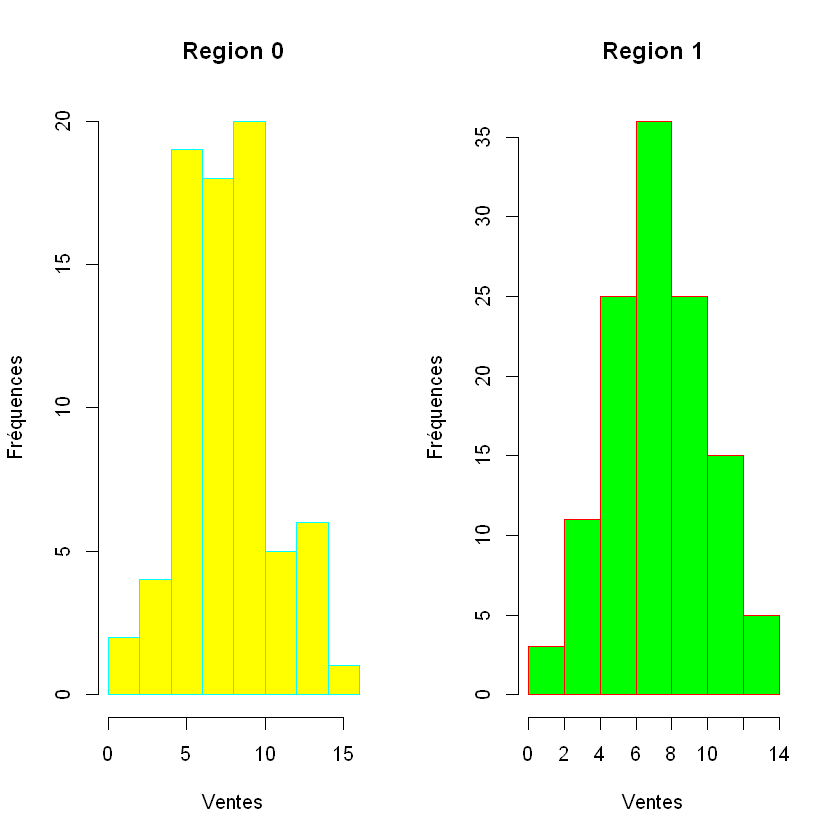

In [223]:
layout(matrix(1:2,1,2))
hist(Y[X3=="0"], col="yellow",border="cyan", 
     main=paste("Region 0"),xlab="Ventes",ylab="Fréquences")
hist(Y[X3=="1"], col="green",border="red", 
     main=paste("Region 1"),xlab="Ventes",ylab="Fréquences")

### Boxplot de vente en fonction de la région

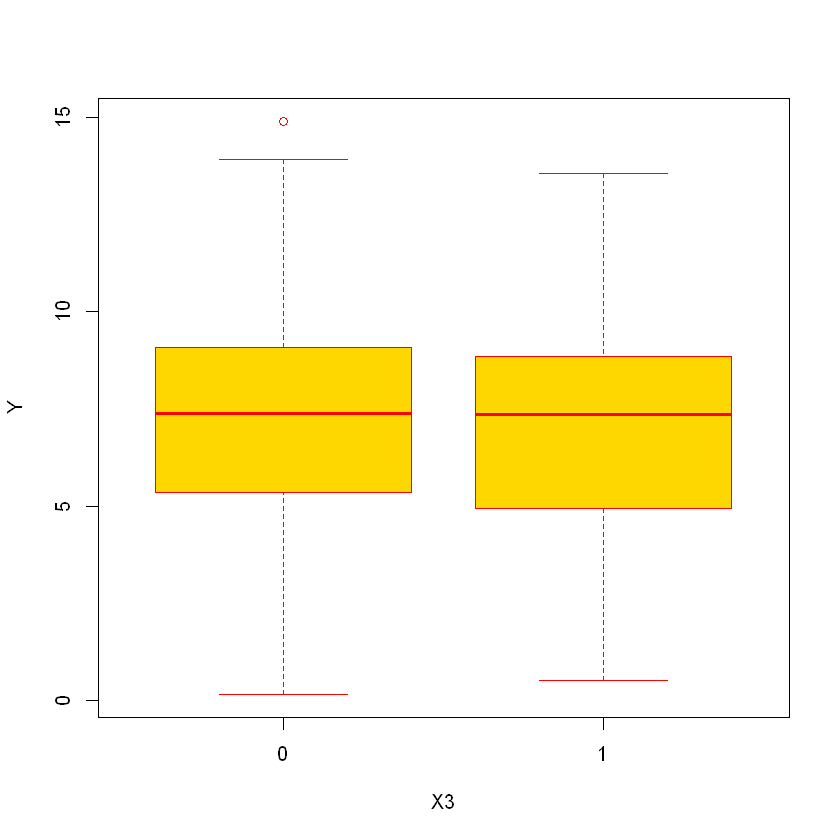

In [253]:
boxplot(Y~X3, col="gold",border="red")

### Tableau de statistique descriptive pour les 2 régions

In [225]:
statistiques = data.frame(ventes=c("Region 0", "Region 1"), 
                     moyenne=NA, s=NA, q1=NA, mediane=NA,
                     q3=NA, interval=NA)
#moyenne
statistiques$moyenne = sapply(0:1, function(i) mean(mondata$Sales[mondata$Region==i]))

# écart-type
statistiques$s = sapply(0:1, function(i) sd(mondata$Sales[mondata$Region==i]))

# mediane
statistiques$mediane = sapply(0:1, function(i) median(mondata$Sales[mondata$Region==i]))

# quantiles q1 et q3
statistiques[1, c("q1", "q3")] = quantile(mondata$Sales[mondata$Region=="0"], probs = c(0.25,0.75))
statistiques[2, c("q1", "q3")] = quantile(mondata$Sales[mondata$Region=="1"], probs = c(0.25,0.75))
                              
# interval de confiance
ci0 <- t.test(mondata$Sales[mondata$Region=="0"], conf.level = 0.95)$conf.int
statistiques[1, c("interval")] = sprintf("[%f, %f]", ci0[1], ci0[2])
                              
ci1 <- t.test(mondata$Sales[mondata$Region=="1"], conf.level = 0.95)$conf.int
statistiques[2, c("interval")] = sprintf("[%f, %f]", ci1[1], ci1[2])

options(digits=4) # Pour limiter le nombre de décimales et 

statistiques                    

ventes,moyenne,s,q1,mediane,q3,interval
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
Region 0,7.474,2.926,5.345,7.380,9.095,"[6.800852, 8.147148]"
Region 1,7.194,2.769,4.955,7.365,8.852,"[6.693506, 7.694494]"


## Tests d'hypothèse

### Test d’hypothèses sur l’égalité des variances pour les deux groupes

In [226]:
rural <- subset(mondata, Region==0)$Sales
urbain <- subset(mondata, Region==1)$Sales
var.test(rural, urbain)


	F test to compare two variances

data:  rural and urbain
F = 1.1, num df = 74, denom df = 119, p-value = 0.6
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 0.7462 1.7045
sample estimates:
ratio of variances 
             1.117 


Dans ce test, on a les hypothèses: 

H0: V1 = V2 vs H1: V1 != V2 (nb: '!=' signifie "non égale a").

Ici V1 est la variance pour le 1er groupe (Region==0) et V2 est la variance pour le 2eme groupe (Region==1)

On remarque que p-value = 0.6 est supérieure au seuil critique (0.05), alors on ne rejette pas l'hypothèse H0

### Test d’hypothèses sur l’égalité des moyennes pour les deux groupes

In [227]:
rural <- subset(mondata, Region==0)$Sales
urbain <- subset(mondata, Region==1)$Sales
t.test(rural, urbain)


	Welch Two Sample t-test

data:  rural and urbain
t = 0.66, df = 151, p-value = 0.5
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.5537  1.1137
sample estimates:
mean of x mean of y 
    7.474     7.194 


Dans ce test, on a les hypothèses:

H0: u1 = u2 vs H1: u1 != u2 (nb: '!=' signifie "non égale a")

ici u1 est la moyenne pour le 1er groupe (Region==0) et u2 est la moyenne pour le 2eme groupe (Region==1)

On remarque que p-value = 0.5 est supérieure au seuil critique (0.05), alors on ne rejette pas l'hypothèse H0

# Phase 2 : Recherche du meilleur modèle
## Partie C

## Étude du modèle 1
Y = beta0 + beta1*X1 + epsilon
<br>Dans un premier temps nous intéressons à un modèle linéaire entre Y et X1. Les résultats de nos analyses ont fourni les données suivantes :

### Graphe de regression
Observons le graphe de cette régression linéaire ci-dessous pour se faire une idée du dispersement des données

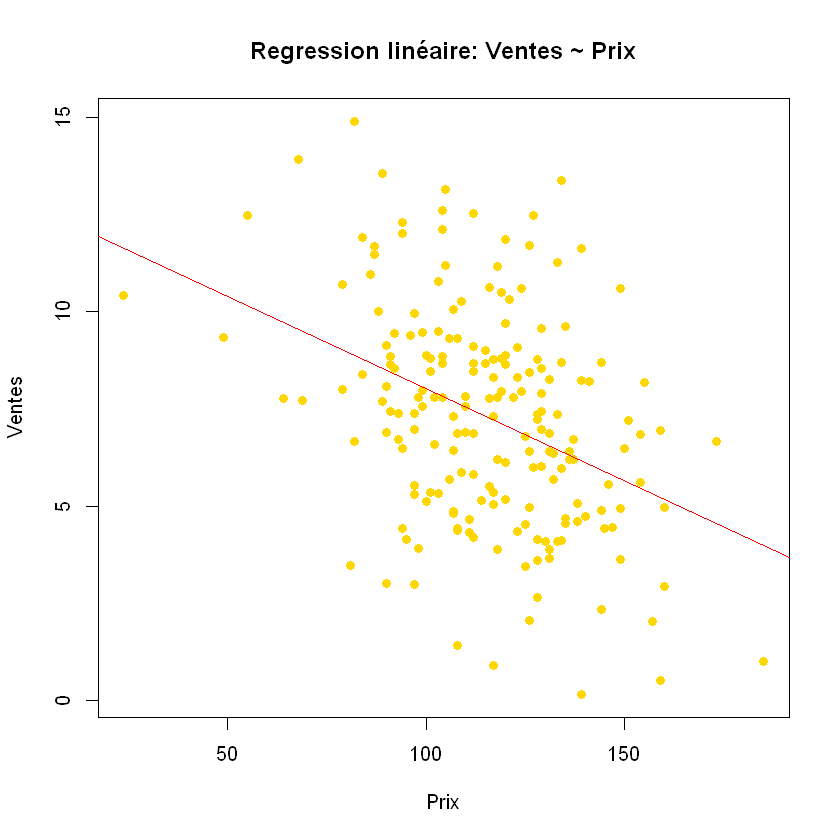

In [228]:
modele1 <- lm(Y ~ X1)

# Create a scatter plot of log(Y) against X1
plot(X1, Y, main = "Regression linéaire: Ventes ~ Prix", col = "gold",
     xlab = "Prix", ylab = "Ventes", pch = 16)

# Add the regression line
abline(modele1, col = "red")

### Tableau d'analyse de la variance

In [229]:
summary(modele1)
anova(modele1)


Call:
lm(formula = Y ~ X1)

Residuals:
   Min     1Q Median     3Q    Max 
-6.318 -1.830 -0.079  1.666  6.969 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 12.78009    0.96962   13.18  < 2e-16 ***
X1          -0.04745    0.00824   -5.76  3.3e-08 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.62 on 193 degrees of freedom
Multiple R-squared:  0.147,	Adjusted R-squared:  0.142 
F-statistic: 33.2 on 1 and 193 DF,  p-value: 3.3e-08


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
X1,1,227.2,227.185,33.16,3.297e-08
Residuals,193,1322.2,6.851,NA,NA


#### Test de la signification du modèle
Les hypothèses sont les suivantes :
-	H0 : β1 = 0 ce qui implique qu’il n’y a pas de relation linéaire entre Y et X1
-	H1 : β1 ≠ 0
<br>La p-value de β1 est 3.3e-08 qui est inférieure au seuil α = 0 ce qui signifie qu’on rejette l’hypothèse H0

### Analyse des résidus
Observons et interprêtons les différents tests effectués sur les résidus avec la figure ci-dessous.

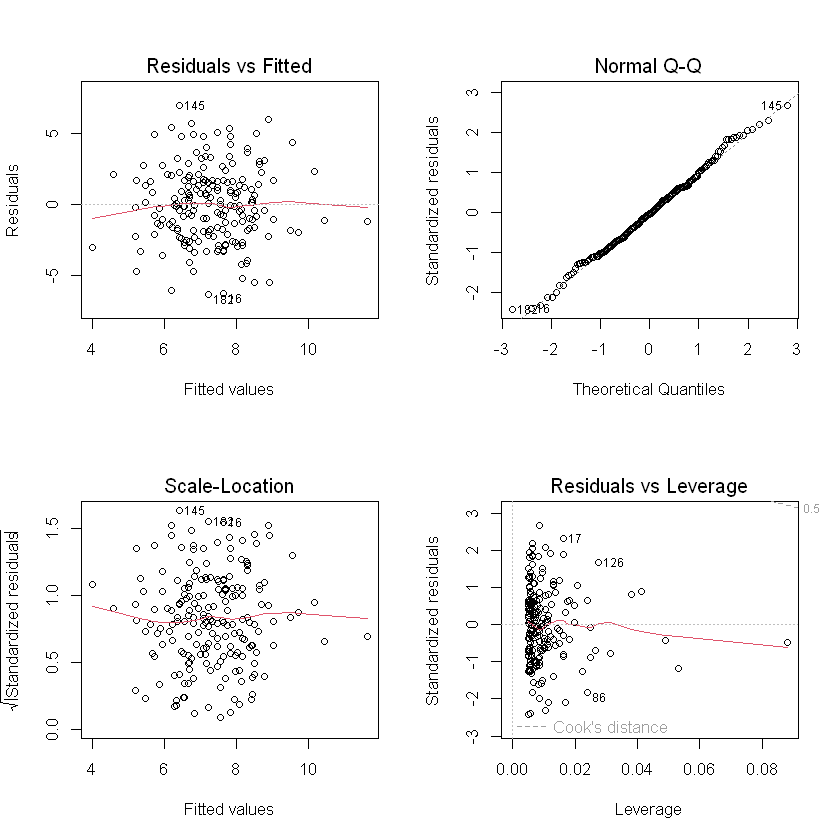

In [260]:
par(mfrow = c(2,2))
plot(modele1)

#### Interprétations:
-	Pour le graphe des residual vs Fitted et le graphe Residual vs Leverage on remarque on remarque une répartition des données assez égale de part et d’autre de l’axe 0. On conclut donc qu’il y a homoscédasticité
-	Pour le graphique Normal Q-Q on constate que les résidus sont majoritairement confondus aux quantiles théoriques de la normal on conclut donc que la distribution de l’erreur suit effectivement une normal
-	En observant le graphe Scale-Location, on remarque que les résidus sont aléatoirement dispersés et ne présentent aucune tendance entre eux. On peut donc conclure qu’il n’y a pas d’autocorrélation entre les résidus 
Ces interprétations montrent que les hypothèses de bases sont respectées par notre modèle, cependant nous avons obtenu comme valeur de R2 :   R2 = 0.1466 qui est très éloigné de 1 nous concluons donc que ce modèle ne convient pas pour faire une prédiction.


### Interval de confiance de beta0 et beta1

In [231]:
conf_int <- confint(modele1)
conf_int

,2.5 %,97.5 %
(Intercept),10.86768,14.6925
X1,-0.06371,-0.0312


## Étude du modèle 2
Y = beta0*(X1^beta1)*exp(epsilon)
<br>Maintenant, nous nous intéressons à un modèle non linéaire entre Y et X1.
<br>Nous allons poser Y* = ln(Y) ce qui va nous permettre d’obtenir
<br>Y* = ln(β0) + β1*ln(X1) + ε


### Graphe de regression
Observons le graphe de la régression linéaire ci-dessous afin de se faire une idée visuellement de l’évolution des données.

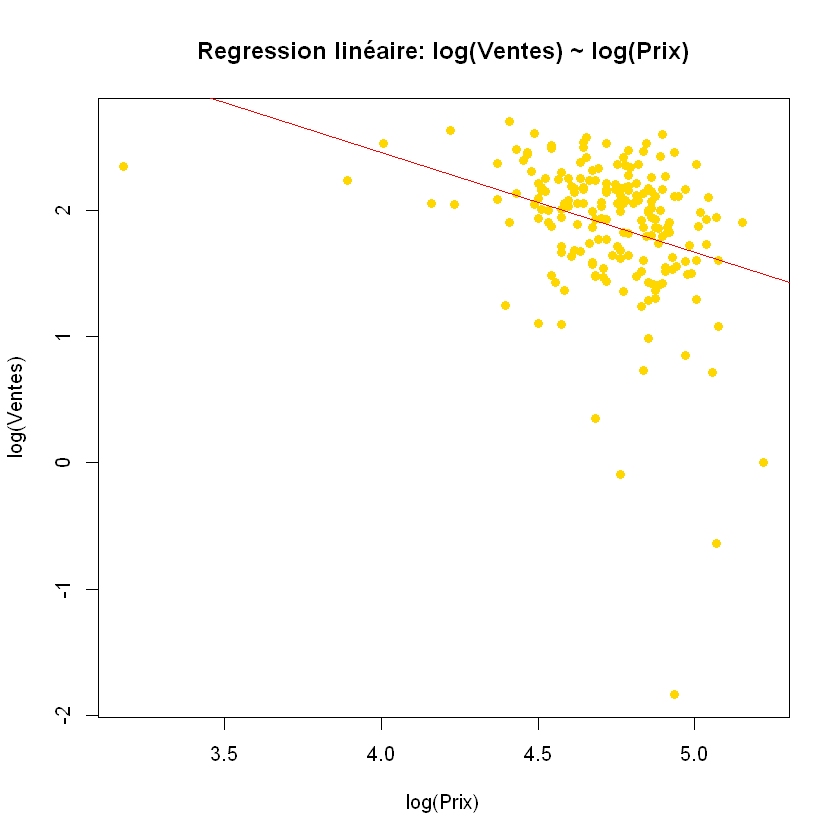

In [232]:
modele2 <- lm(log(Y) ~ log(X1))

# Create a scatter plot of log(Y) against X1
plot(log(X1), log(Y), main = "Regression linéaire: log(Ventes) ~ log(Prix)", col = "gold",
     xlab = "log(Prix)", ylab = "log(Ventes)", pch = 16)

# Add the regression line
abline(modele2, col = "red")

### Tableau d'analyse de la variance

In [233]:
summary(modele2)
anova(modele2)


Call:
lm(formula = log(Y) ~ log(X1))

Residuals:
   Min     1Q Median     3Q    Max 
-3.549 -0.209  0.094  0.320  0.849 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)    5.599      0.779    7.19  1.4e-11 ***
log(X1)       -0.787      0.165   -4.78  3.5e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.523 on 193 degrees of freedom
Multiple R-squared:  0.106,	Adjusted R-squared:  0.101 
F-statistic: 22.8 on 1 and 193 DF,  p-value: 3.49e-06


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
log(X1),1,6.255,6.2548,22.83,3.49e-06
Residuals,193,52.866,0.2739,NA,NA


#### Test de la signification du modèle
Les hypothèses sont les suivantes :
-	H0 : β1 = 0 ce qui implique qu’il n’y a pas de relation linéaire entre ln(Y) et ln(X1)
-	H1 : β1 ≠ 0
<br>La p-value de β1 est 3.49e-06 qui est inférieure au seuil α = 0.05 ce qui signifie qu’on rejette l’hypothèse H0

### Analyse des résidus
Observons les différents les différents tests effectués sur les résidus avec la figure ci-dessous.

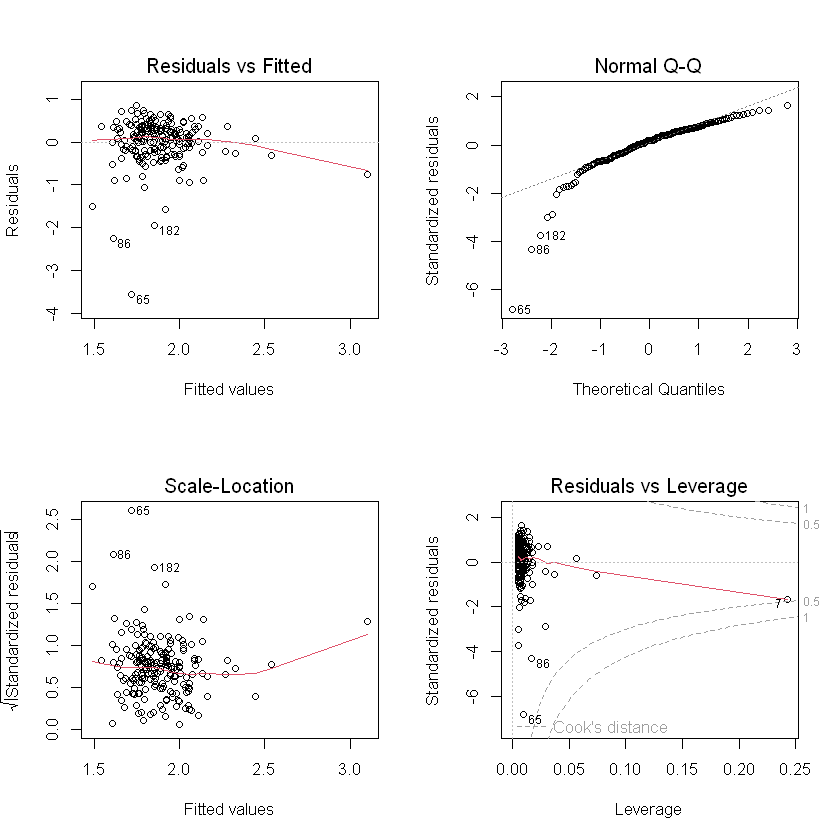

In [259]:
par(mfrow = c(2,2))
plot(modele2)

#### Interprétations:
-	Pour le graphe des residual vs Fitted et le graphe Residual vs Leverage on remarque on remarque une répartition des données assez égale de part et d’autre de l’axe 0. On conclut donc qu’il y a homoscédasticité
-	Pour le graphique Normal Q-Q on constate que les résidus sont majoritairement confondus aux quantiles théoriques de la normal on conclut donc que la distribution de l’erreur suit effectivement une normal
-	En observant le graphe Scale-Location, on remarque que les résidus sont aléatoirement dispersés et ne présentent aucune tendance entre eux. On peut donc conclure qu’il n’y a pas d’autocorrélation entre les résidus 
Ces interprétations montrent que les hypothèses de bases sont respectées par notre modèle, nous concluons donc que ce modèle est utilisable pour faire une prédiction


### Interval de confiance de beta0 et beta1

In [235]:
# Obtenir les intervalles de confiance des coefficients
conf_int <- confint(modele2) # Calculer les intervalles de confiance
# Afficher les résultats
conf_int

,2.5 %,97.5 %
(Intercept),4.062,7.135
log(X1),-1.111,-0.462


## Étude du modèle 3
Y = beta0 * exp[(beta1 * X1) + epsilon]
<br>Maintenant, nous nous intéressons à un autre modèle non linéaire entre Y et X1.
<br>Nous allons poser Y* = ln(Y) ce qui va nous permettre d’obtenir
<br>Y* = ln(β0) + β1*X1 + ε

### Graphe de regression

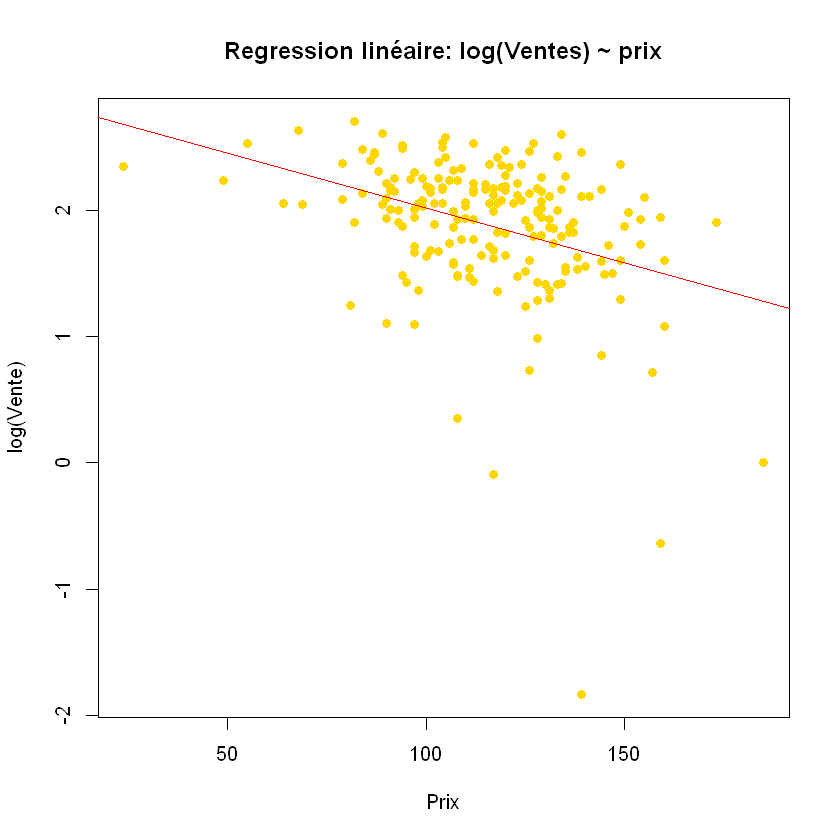

In [236]:
modele3 <- lm(log(Y) ~ (X1))

# Create a scatter plot of log(Y) against X1
plot(X1, log(Y), main = "Regression linéaire: log(Ventes) ~ prix", col = "gold",
     xlab = "Prix", ylab = "log(Vente)", pch = 16)

# Add the regression line
abline(modele3, col = "red")

### Tableau d'analyse de la variance

In [237]:
summary(modele3)
anova(modele3)


Call:
lm(formula = log(Y) ~ (X1))

Residuals:
   Min     1Q Median     3Q    Max 
-3.508 -0.212  0.101  0.309  0.875 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.88607    0.19131   15.09  < 2e-16 ***
X1          -0.00871    0.00163   -5.36  2.4e-07 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.516 on 193 degrees of freedom
Multiple R-squared:  0.129,	Adjusted R-squared:  0.125 
F-statistic: 28.7 on 1 and 193 DF,  p-value: 2.41e-07


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
X1,1,7.65,7.6500,28.68,2.407e-07
Residuals,193,51.47,0.2667,NA,NA


#### Test de la signification du modèle
Les hypothèses sont les suivantes :
-	H0 : β1 = 0 ce qui implique qu’il n’y a pas de relation linéaire entre ln(Y) et X1
-	H1 : β1 ≠ 0
<br>La p-value de β1 est 2.41e-07 qui est inférieure au seuil α = 0.05 ce qui signifie qu’on rejette l’hypothèse H0

### Analyse des résidus
Observons et interprêtons les différents les différents tests effectués sur les résidus avec la figure ci-dessous.

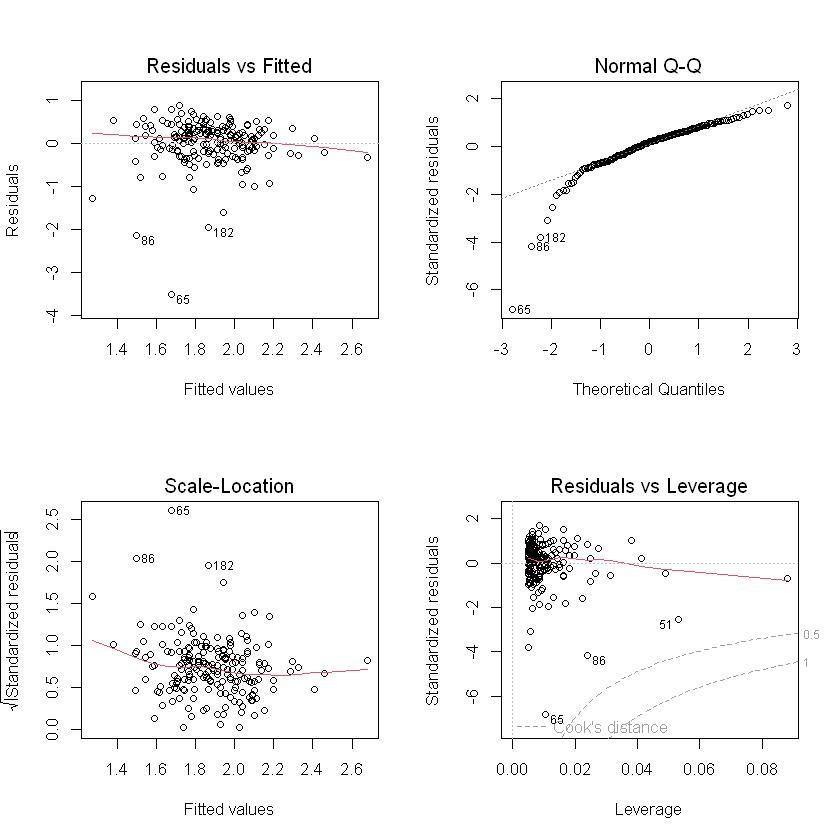

In [258]:
par(mfrow = c(2,2))
plot(modele3)

#### Interprétations:
-	Pour le graphe des residual vs Fitted et le graphe Residual vs Leverage on remarque on remarque une répartition des données assez égale de part et d’autre de l’axe 0. On conclut donc qu’il y a homoscédasticité
-	Pour le graphique Normal Q-Q on constate que les résidus sont majoritairement confondus aux quantiles théoriques de la normal on conclut donc que la distribution de l’erreur suit effectivement une normal
-	En observant le graphe Scale-Location, on remarque que les résidus sont aléatoirement dispersés et ne présentent aucune tendance entre eux. On peut donc conclure qu’il n’y a pas d’autocorrélation entre les résidus 
Ces interprétations montrent que toutes les hypothèses de bases sont respectées par notre modèle, nous concluons donc que ce modèle est utilisable pour faire une prédiction.


### Interval de confiance de beta0 et beta1

In [239]:
# Obtenir les intervalles de confiance des coefficients
conf_int <- confint(modele3) # Calculer les intervalles de confiance
# Afficher les résultats
conf_int


,2.5 %,97.5 %
(Intercept),2.50874,3.263393
X1,-0.01191,-0.005501


## Étude du modèle 4
Y = beta0 + beta1*X2 + epsilon
<br>Nous nous intéressons à un modèle linéaire entre Y et X2. Les résultats de nos analyses ont fourni les données suivantes :

### Graphe de regression
La figure ci-dessous représente la droite de regréssion linéaire entre Y et X2

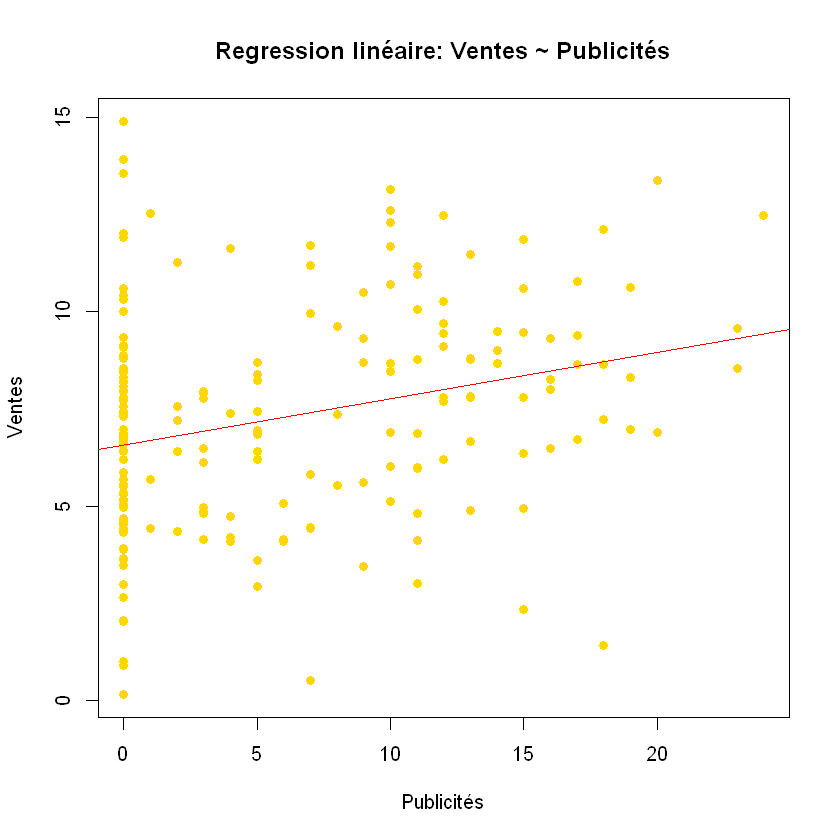

In [240]:
modele4 <- lm(Y ~ X2)

# Create a scatter plot of log(Y) against X1
plot(X2, Y, main = "Regression linéaire: Ventes ~ Publicités", col = "gold",
     xlab = "Publicités", ylab = "Ventes", pch = 16)

# Add the regression line
abline(modele4, col = "red")

### Tableau d'analyse de la variance

In [241]:
summary(modele4)
anova(modele4)


Call:
lm(formula = Y ~ X2)

Residuals:
   Min     1Q Median     3Q    Max 
-7.306 -1.969 -0.076  1.648  8.320 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)    6.580      0.266   24.71  < 2e-16 ***
X2             0.119      0.030    3.98  9.8e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.72 on 193 degrees of freedom
Multiple R-squared:  0.0758,	Adjusted R-squared:  0.071 
F-statistic: 15.8 on 1 and 193 DF,  p-value: 9.81e-05


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
X2,1,117.4,117.431,15.83,9.81e-05
Residuals,193,1431.9,7.419,NA,NA


#### Test de la signification du modèle
Les hypothèses sont les suivantes :
-	H0 : β1 = 0 ce qui implique qu’il n’y a pas de relation linéaire entre Y et X2
-	H1 : β1 ≠ 0
<br>La p-value de β1 est 9.81e-05 qui est inférieure au seuil α = 0.05 ce qui signifie qu’on rejette l’hypothèse H0

### Analyse des résidus
Observons et interprêtons les différents tests effectués sur les résidus avec la figure ci-dessous.

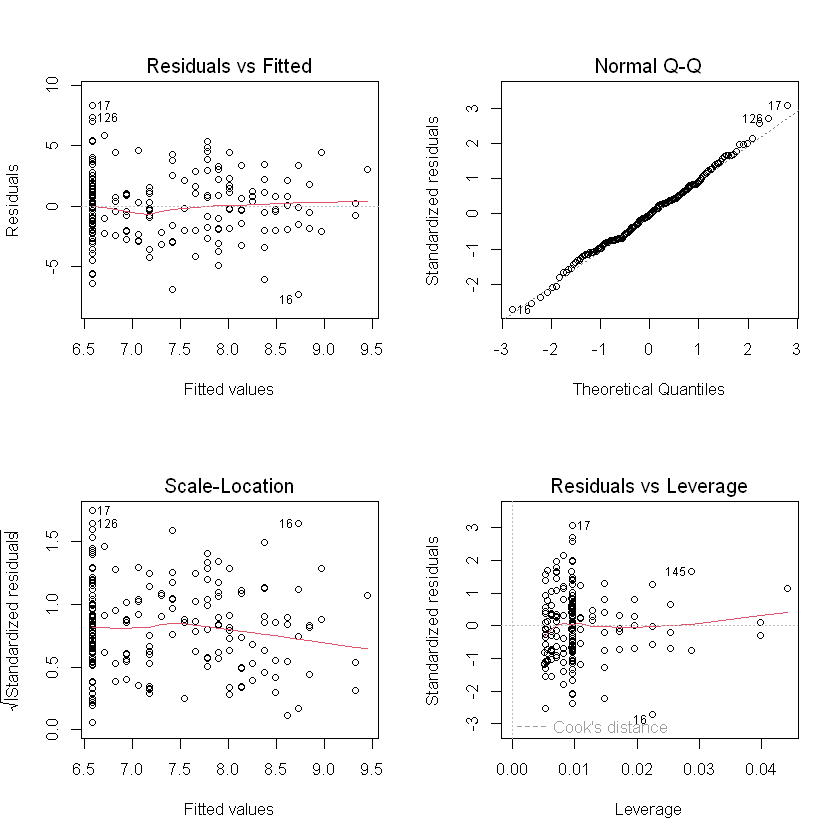

In [242]:
par(mfrow = c(2,2))
plot(modele4)

#### Interprétations:
-	Pour le graphe des residual vs Fitted et le graphe Residual vs Leverage on remarque on remarque une répartition des données assez égale de part et d’autre de l’axe 0. On conclut donc qu’il y a homoscédasticité
-	Pour le graphique Normal Q-Q on constate que les résidus sont majoritairement confondus aux quantiles théoriques de la normal on conclut donc que la distribution de l’erreur suit effectivement une normal
-	En observant le graphe Scale-Location, on remarque que les résidus sont aléatoirement dispersés et ne présentent aucune tendance entre eux. On peut donc conclure qu’il n’y a pas d’autocorrélation entre les résidus 
Ces interprétations montrent que les hypothèses de bases sont respectées par notre modèle, nous concluons donc que ce modèle est utilisable pour faire une prédiction


### Interval de confiance de beta0 et beta1

In [243]:
conf_int <- confint(modele4)
conf_int

,2.5 %,97.5 %
(Intercept),6.05505,7.1056
X2,0.06011,0.1783


## Étude du modèle 5
Y = beta0*(8 + X2^beta1)*exp(epsilon)
<br>Maintenant, nous nous intéressons à un modèle non linéaire entre Y et X1.
<br>Nous allons poser Y* = ln(Y) ce qui va nous permettre d’obtenir
<br>Y* = ln(β0) + ln(8 + X1^β1) + ε

### Graphe de regression

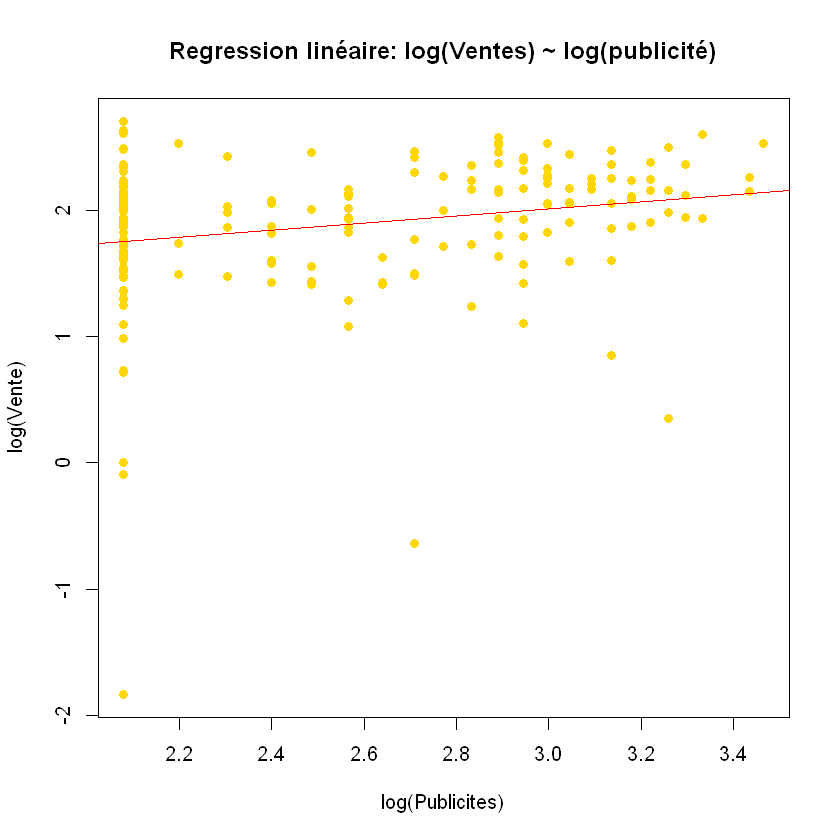

In [244]:
modele5 <- lm(log(Y) ~ log(X2+8))

# Create a scatter plot of log(Y) against X2
plot(log(X2+8), log(Y), main = "Regression linéaire: log(Ventes) ~ log(publicité)", col = "gold",
     xlab = "log(Publicites)", ylab = "log(Vente)", pch = 16)

# Add the regression line
abline(modele5, col = "red")

### Tableau d'analyse de la variance

In [245]:
summary(modele5)
anova(modele5)


Call:
lm(formula = log(Y) ~ log(X2 + 8))

Residuals:
   Min     1Q Median     3Q    Max 
-3.585 -0.207  0.105  0.315  0.949 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   1.1735     0.2222    5.28  3.4e-07 ***
log(X2 + 8)   0.2785     0.0861    3.23   0.0014 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.539 on 193 degrees of freedom
Multiple R-squared:  0.0514,	Adjusted R-squared:  0.0464 
F-statistic: 10.4 on 1 and 193 DF,  p-value: 0.00144


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
log(X2 + 8),1,3.037,3.0366,10.45,0.001443
Residuals,193,56.085,0.2906,NA,NA


#### Test de la signification du modèle
Les hypothèses sont les suivantes :
-	H0 : β1 = 0 ce qui implique qu’il n’y a pas de relation linéaire entre Y et X2
-	H1 : β1 ≠ 0
<br>La p-value de β1 est 0.00144 qui est inférieure au seuil α = 0.05 ce qui signifie qu’on rejette l’hypothèse H0

### Analyse des résidus
Observons les différents tests effectués sur les résidus avec la figure ci-dessous.

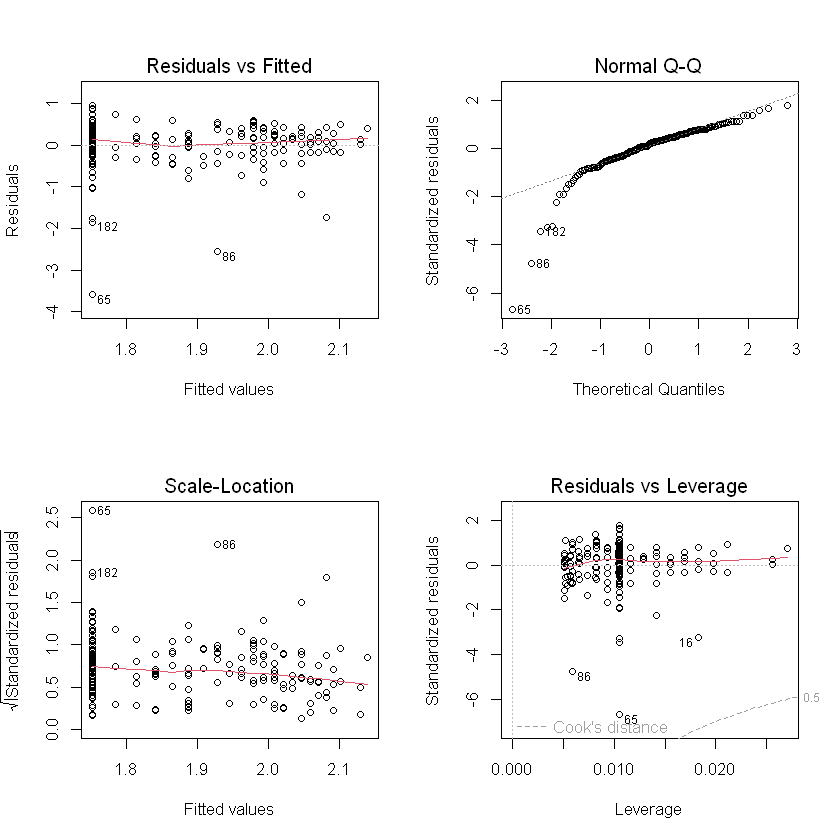

In [246]:
par(mfrow = c(2,2))
plot(modele5)

#### Interprétations:
-	Pour le graphe des residual vs Fitted et le graphe Residual vs Leverage on remarque on remarque une répartition des données assez égale de part et d’autre de l’axe 0. On conclut donc qu’il y a homoscédasticité
-	Pour le graphique Normal Q-Q on constate que les résidus sont majoritairement confondus aux quantiles théoriques de la normal on conclut donc que la distribution de l’erreur suit effectivement une normal
-	En observant le graphe Scale-Location, on remarque que les résidus sont aléatoirement dispersés et ne présentent aucune tendance entre eux. On peut donc conclure qu’il n’y a pas d’autocorrélation entre les résidus 
Ces interprétations montrent que les hypothèses de bases sont respectées par notre modèle, nous concluons donc que ce modèle est utilisable pour faire une prédiction


### Interval de confiance de beta0 et beta1

In [247]:
# Obtenir les intervalles de confiance des coefficients
conf_int <- confint(modele5) # Calculer les intervalles de confiance
# Afficher les résultats
conf_int


,2.5 %,97.5 %
(Intercept),0.7353,1.6117
log(X2 + 8),0.1086,0.4483


## Étude du modèle 6
Y = beta0 * exp[(beta1 * X2) + epsilon]
<br>Maintenant, nous nous intéressons à un autre modèle non linéaire entre Y et X2.
<br>Nous allons poser Y* = ln(Y) ce qui va nous permettre d’obtenir
<br>Y* = ln(β0) + β1*X2 + ε

### Graphe de regression

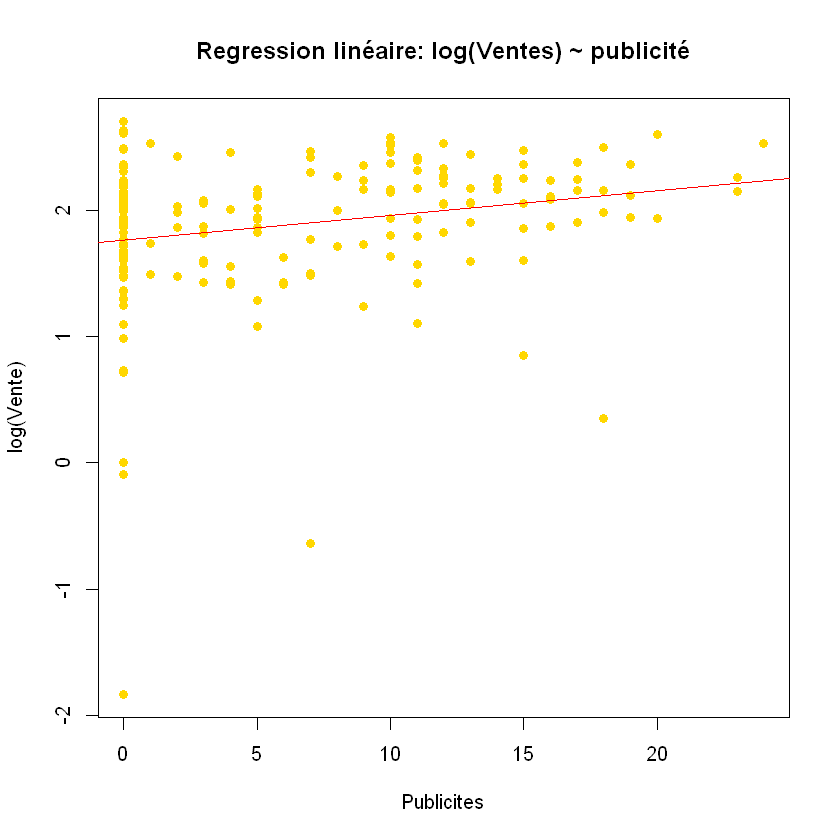

In [248]:
modele6 <- lm(log(Y) ~ X2)

# Create a scatter plot of log(Y) against X1
plot(X2, log(Y), main = "Regression linéaire: log(Ventes) ~ publicité", col = "gold",
     xlab = "Publicites", ylab = "log(Vente)", pch = 16)

# Add the regression line
abline(modele6, col = "red")

### Tableau d'analyse de la variance

In [249]:
summary(modele6)
anova(modele6)


Call:
lm(formula = log(Y) ~ X2)

Residuals:
   Min     1Q Median     3Q    Max 
-3.595 -0.210  0.079  0.304  0.939 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.76199    0.05264   33.47   <2e-16 ***
X2           0.01963    0.00592    3.31   0.0011 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.538 on 193 degrees of freedom
Multiple R-squared:  0.0539,	Adjusted R-squared:  0.0489 
F-statistic:   11 on 1 and 193 DF,  p-value: 0.0011


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
X2,1,3.184,3.1838,10.98,0.001097
Residuals,193,55.937,0.2898,NA,NA


#### Test de la signification du modèle
Les hypothèses sont les suivantes :
-	H0 : β1 = 0 ce qui implique qu’il n’y a pas de relation linéaire entre ln(Y) et X1
-	H1 : β1 ≠ 0
<br>La p-value de β1 est 0.0011 qui est inférieure au seuil α = 0.05 ce qui signifie qu’on rejette l’hypothèse H0

### Analyse des résidus
Observons et interprêtons les différents tests effectués sur les résidus avec la figure ci-dessous.

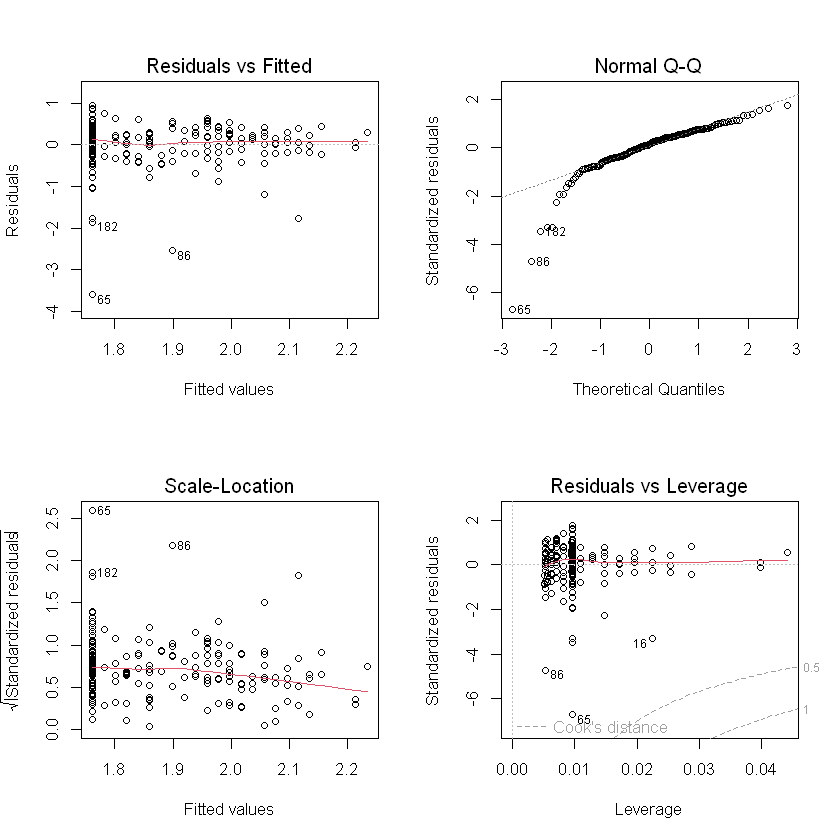

In [250]:
par(mfrow = c(2,2))
plot(modele6)

#### Interprétations:
-	Pour le graphe des residual vs Fitted et le graphe Residual vs Leverage on remarque on remarque une répartition des données assez égale de part et d’autre de l’axe 0. On conclut donc qu’il y a homoscédasticité
-	Pour le graphique Normal Q-Q on constate que les résidus sont majoritairement confondus aux quantiles théoriques de la normal on conclut donc que la distribution de l’erreur suit effectivement une normal
-	En observant le graphe Scale-Location, on remarque que les résidus sont aléatoirement dispersés et ne présentent aucune tendance entre eux. On peut donc conclure qu’il n’y a pas d’autocorrélation entre les résidus 
Ces interprétations montrent que les hypothèses de bases sont respectées par notre modèle, nous concluons donc que ce modèle est utilisable pour faire une prédiction


### Interval de confiance de beta0 et beta1

In [251]:
# Obtenir les intervalles de confiance des coefficients
conf_int <- confint(modele6) # Calculer les intervalles de confiance
# Afficher les résultats
conf_int


,2.5 %,97.5 %
(Intercept),1.658174,1.86581
X2,0.007948,0.03131


## Choix du meilleur modèle:
<br> Déterminons quel modèle est le plus adapté en fonction du Coefficient de d´etermination R^2
<br> Modèle1 R^2 = 0.1466
<br> Modèle3 R^2 = 0.1294
<br> Modèle4 R^2 = 0.07579
<br> Modèle5 R^2 = 0.05136
<br> Modèle6 R^2 = 0.05385
<br> Pour départager nous allons choisir le modèle qui a le plus grand R^2. Le modèle le plus approprié pour notre prévision sur les ventes est donc le modèle1

## Prévision des ventes en fonction du meilleur modele

In [252]:
predict(modele1, data.frame(X1 = 118), level = 0.95)

1 
7.181

## Interprétation
Le résultat obtenu montre qu'on est certain à 95% ce vendre 7180 à 118$ peu importe le montant investi en publicité et peu importe la région